Peyton Wong  

# Assignment 4: Linear Regression Model on Global Air Quality Dataset
---

I will be using the same dataset from assignment 3, Global Air Quality, from Kaggle.

This dataset focuses on CO, CO2, NO2, SO2, O3, PM2.5, PM10 levels in six major cities, along with its Air Quality Index (AQI).  

---

**Target:**  
AQI: Air Quality Index  
**Predictors:**  
CO: Carbon Monoxide Levels  
CO2: Carbon Dioxide Levels  
NO2: Nitrogen Dioxide Levels  
SO2: Sulfur Dioxide Levels  
O3: Ozone Levels  
PM2.5: Particle Matter Levels (Diameter less than 2.5mm)  
PM10: Particle Matter Levels (Diameter less than 10mm)

---


# 1. Acquire & Preview Dataset
---
**Summary:**
- Initial preview of dataset including df.head(), df.info() and df.describe.transpose(). This will define the first few rows of data structure, data types, non-null counts, memory usage and descriptive statistics
- Reuse strategy from Assignment 3 to impute missing values with its median (CO2_filled)
- Manually define predictors and target for my model. Another preview will be made to check that imputed method worked

---

In [ ]:
import pandas as pd

# Make sure Air_Quality_Final_Dataset.csv is in sample_data folder in Colab
# Absolute path
air_quality_df = pd.read_csv('/content/sample_data/Air_Quality_Final_Dataset.csv')

# This is my first preview of the dataset

# Using df.head() to display the first few rows to preview data
display(air_quality_df.head())

# Checking data types, non-null counts, and memory usage
print(air_quality_df.info())

# Descriptive statistics to quickly summarize numeric features
display(air_quality_df.describe().transpose())

,Date,Time,City,CO,CO2,NO2,SO2,O3,PM2.5,PM10,AQI
0,2023-12-31,4:00:00 AM,Brasilia,323,NaN,23.8,2.8,42,12.0,17.1,16.800000
1,2023-12-31,5:00:00 AM,Brasilia,318,NaN,21.9,2.7,40,12.5,17.9,16.000000
2,2023-12-31,6:00:00 AM,Brasilia,309,NaN,19.2,2.6,39,12.1,17.3,15.599999
3,2023-12-31,7:00:00 AM,Brasilia,295,NaN,16.3,2.4,38,11.4,16.2,15.200000
4,2023-12-31,8:00:00 AM,Brasilia,270,NaN,13.0,2.1,40,10.2,14.6,16.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52704 entries, 0 to 52703
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    52704 non-null  object 
 1   Time    52704 non-null  object 
 2   City    52704 non-null  object 
 3   CO      52704 non-null  int64  
 4   CO2     9648 non-null   float64
 5   NO2     52704 non-null  float64
 6   SO2     52704 non-null  float64
 7   O3      52704 non-null  int64  
 8   PM2.5   52704 non-null  float64
 9   PM10    52704 non-null  float64
 10  AQI     52704 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.4+ MB
None


,count,mean,std,min,25%,50%,75%,max
CO,52704.0,258.258121,159.589953,52.00,159.0,213.000000,306.000000,2045.00000
CO2,9648.0,462.348259,33.769009,434.00,445.0,453.000000,467.000000,884.00000
NO2,52704.0,24.102998,19.363443,0.00,9.7,18.900000,33.400000,165.90000
SO2,52704.0,12.569869,17.266623,0.00,2.3,5.700000,16.800000,239.70000
O3,52704.0,60.025729,38.217348,0.00,35.0,54.000000,78.000000,349.00000
PM2.5,52704.0,17.689931,15.670075,0.10,6.9,12.500000,23.000000,129.50000
PM10,52704.0,35.643143,48.444774,0.10,10.2,18.900000,37.500000,543.90000
AQI,52704.0,41.349339,26.626149,4.45,22.8,31.270835,57.702089,196.63333


Missing values per column:
 Date         0
Time         0
City         0
CO           0
CO2      43056
NO2          0
SO2          0
O3           0
PM2.5        0
PM10         0
AQI          0
dtype: int64


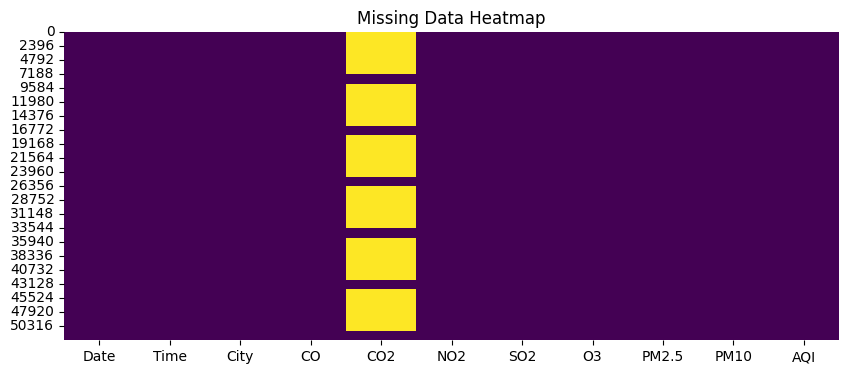

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Defining the missing values in each column of my dataset
missing_air_quality = air_quality_df.isna().sum()
print("Missing values per column:\n", missing_air_quality)

# Visualize missing data using heatmap
plt.figure(figsize=(10,4))
sns.heatmap(air_quality_df.isna(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()


In [ ]:
# Impute missing values

# The rows that have CO2 values fall around the 439.0-450.0 range

# My strategy is to fill the missing values with it's median
median_carbon_dioxide = air_quality_df["CO2"].median()

# Fill missing 'CO2' with median
air_quality_df["CO2_filled"] = air_quality_df["CO2"].fillna(median_carbon_dioxide)

# Confirm median filling method worked
print("Missing 'CO2' before:", air_quality_df["CO2"].isna().sum())
print("Missing 'CO2_filled' after:", air_quality_df["CO2_filled"].isna().sum())

Missing 'CO2' before: 43056
Missing 'CO2_filled' after: 0


In [ ]:
# Manually select predictor columns and target column
predictor_cols = ['CO', 'CO2_filled', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10']
target_col = 'AQI'

# Extract features and target
X = air_quality_df[predictor_cols]
y = air_quality_df[target_col]

# Now, we preview predictors and target

# Combine predictors and target into one DataFrame for convenient inspection
concat_aq_df = pd.concat([X, y.rename('AQI')], axis=1)

# Using df.head() to display the first few rows to preview modified data
display(concat_aq_df.head())

# Double check data types, non-null counts, memory usage
print(concat_aq_df.info())

# Double check descriptive statistics to quickly summarize numeric features
display(concat_aq_df.describe().transpose())

,CO,CO2_filled,NO2,SO2,O3,PM2.5,PM10,AQI
0,323,453.0,23.8,2.8,42,12.0,17.1,16.800000
1,318,453.0,21.9,2.7,40,12.5,17.9,16.000000
2,309,453.0,19.2,2.6,39,12.1,17.3,15.599999
3,295,453.0,16.3,2.4,38,11.4,16.2,15.200000
4,270,453.0,13.0,2.1,40,10.2,14.6,16.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52704 entries, 0 to 52703
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CO          52704 non-null  int64  
 1   CO2_filled  52704 non-null  float64
 2   NO2         52704 non-null  float64
 3   SO2         52704 non-null  float64
 4   O3          52704 non-null  int64  
 5   PM2.5       52704 non-null  float64
 6   PM10        52704 non-null  float64
 7   AQI         52704 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 3.2 MB
None


,count,mean,std,min,25%,50%,75%,max
CO,52704.0,258.258121,159.589953,52.00,159.0,213.000000,306.000000,2045.00000
CO2_filled,52704.0,454.711293,14.893070,434.00,453.0,453.000000,453.000000,884.00000
NO2,52704.0,24.102998,19.363443,0.00,9.7,18.900000,33.400000,165.90000
SO2,52704.0,12.569869,17.266623,0.00,2.3,5.700000,16.800000,239.70000
O3,52704.0,60.025729,38.217348,0.00,35.0,54.000000,78.000000,349.00000
PM2.5,52704.0,17.689931,15.670075,0.10,6.9,12.500000,23.000000,129.50000
PM10,52704.0,35.643143,48.444774,0.10,10.2,18.900000,37.500000,543.90000
AQI,52704.0,41.349339,26.626149,4.45,22.8,31.270835,57.702089,196.63333


# 2. Wrangle / Feature Engineering Steps #
---
I decided not to create any new feature engineers. Each predictor is unique to the dataset and we are looking for the top predictor of changing AQI levels.

**Summary:**  
- Missing value imputation was done in the preview step (CO2_filled)
- Verifying data types (d.types) and using snake_case for consistency. Preview data before and after correction.
- Log-transformation of AQI, showing original vs. log-transformed data on histograms
- Final dataset preview after wrangling steps
---

In [ ]:
# Initial data type verification
print("\nData types before correction:\n", air_quality_df.dtypes)

# Column naming consistency using snake_case
air_quality_df.columns = air_quality_df.columns.str.lower()

# Verifying data after defining snake_case
print("\nData in snake case\n", air_quality_df.columns)


Data types before correction:
 Date           object
Time           object
City           object
CO              int64
CO2           float64
NO2           float64
SO2           float64
O3              int64
PM2.5         float64
PM10          float64
AQI           float64
CO2_filled    float64
dtype: object

Data in snake case
 Index(['date', 'time', 'city', 'co', 'co2', 'no2', 'so2', 'o3', 'pm2.5',
       'pm10', 'aqi', 'co2_filled'],
      dtype='object')


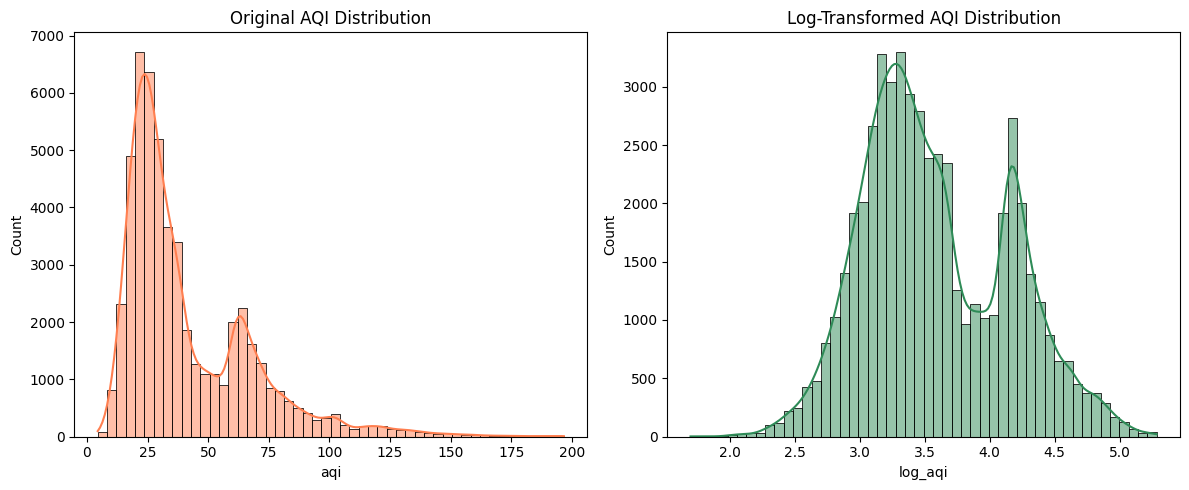


Final cleaned dataset preview:



,date,time,city,co,co2,no2,so2,o3,pm2.5,pm10,aqi,co2_filled,log_aqi
0,2023-12-31,4:00:00 AM,Brasilia,323,NaN,23.8,2.8,42,12.0,17.1,16.800000,453.0,2.879198
1,2023-12-31,5:00:00 AM,Brasilia,318,NaN,21.9,2.7,40,12.5,17.9,16.000000,453.0,2.833213
2,2023-12-31,6:00:00 AM,Brasilia,309,NaN,19.2,2.6,39,12.1,17.3,15.599999,453.0,2.809403
3,2023-12-31,7:00:00 AM,Brasilia,295,NaN,16.3,2.4,38,11.4,16.2,15.200000,453.0,2.785011
4,2023-12-31,8:00:00 AM,Brasilia,270,NaN,13.0,2.1,40,10.2,14.6,16.000000,453.0,2.833213


In [ ]:
# Feature transformation: log-transform 'AQI'
air_quality_df['log_aqi'] = np.log1p(air_quality_df['aqi'])

# Original vs. log-transformed 'AQI' distributions
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(air_quality_df['aqi'], bins=50, ax=axes[0], kde=True, color='coral')
axes[0].set_title('Original AQI Distribution')

sns.histplot(air_quality_df['log_aqi'], bins=50, ax=axes[1], kde=True, color='seagreen')
axes[1].set_title('Log-Transformed AQI Distribution')

plt.tight_layout()
plt.show()

# Final dataset preview after wrangling
print("\nFinal cleaned dataset preview:\n")
display(air_quality_df.head())

# 3. Visualisation & EDA #
---
An Exploratory Data Analysis library that presents the distribution of key predictors and target

**Summary:**
- Target variable distribution using histogram
- Distribution of key predictors using histogram
- Predictors vs. target scatterplots
- Correlation Heatmap for multicollinearity
- Outlier detection using boxplots
---

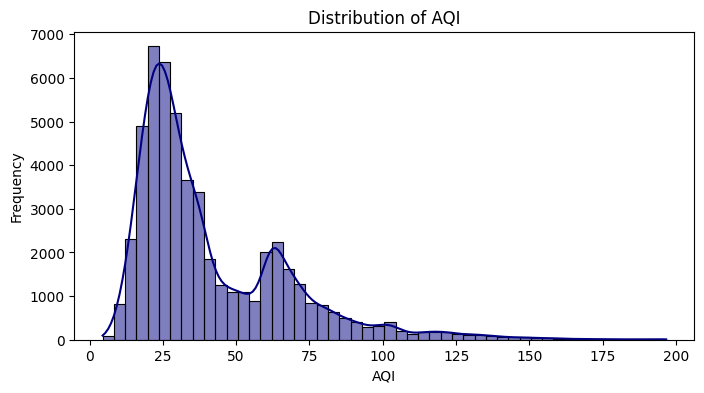

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Target Variable Distribution Histogram
plt.figure(figsize=(8,4))
sns.histplot(air_quality_df['aqi'], bins=50, kde=True, color='navy')
plt.title('Distribution of AQI')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()

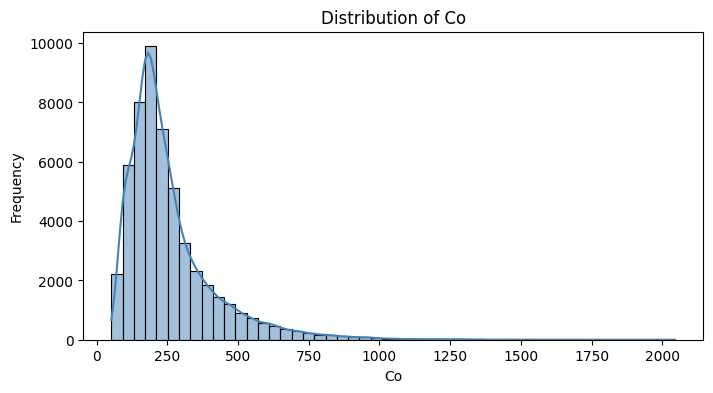

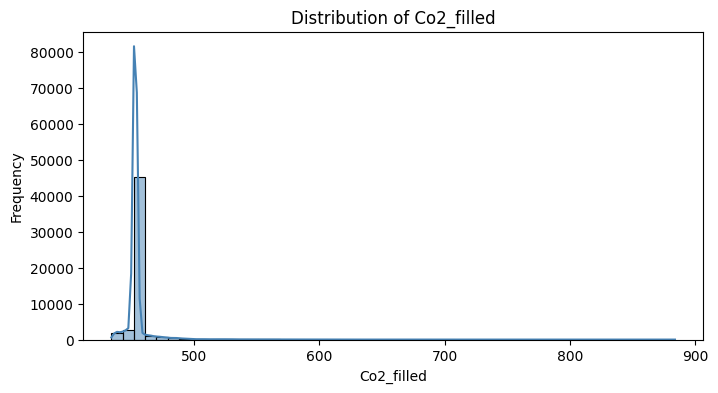

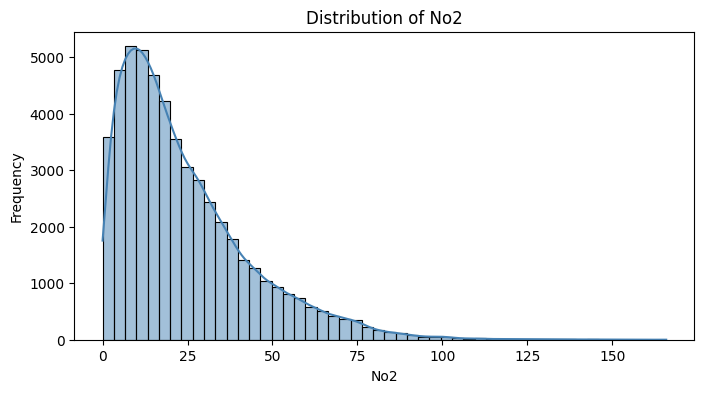

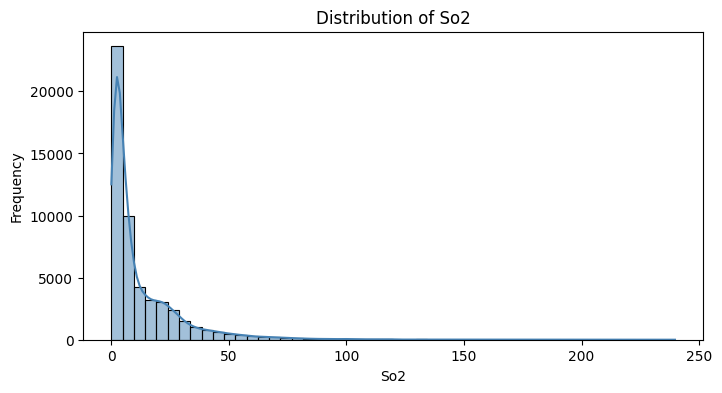

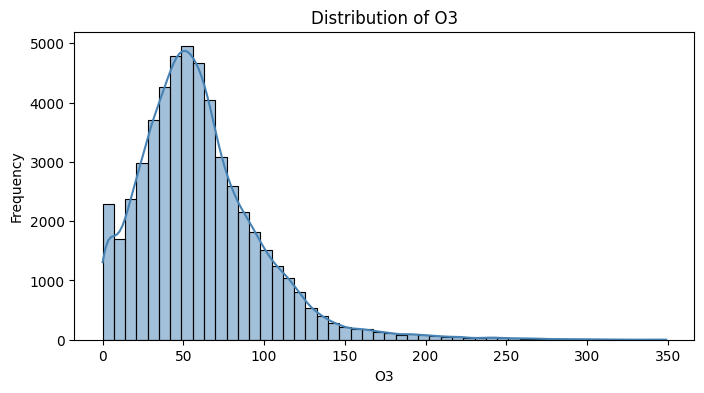

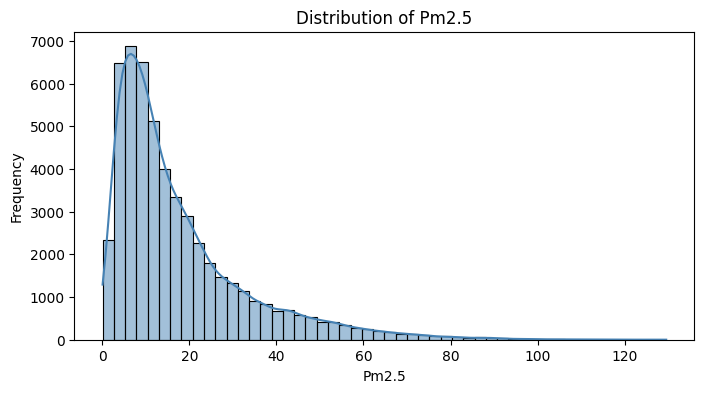

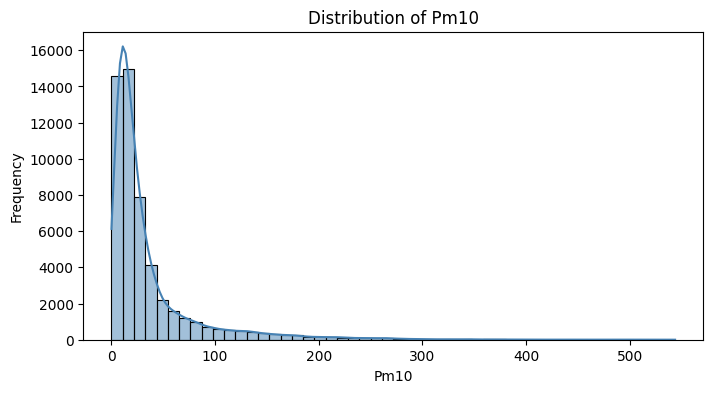

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Key Predictors Histograms
features = ['co', 'co2_filled', 'no2', 'so2', 'o3', 'pm2.5', 'pm10']
for feature in features:
    plt.figure(figsize=(8,4))
    sns.histplot(air_quality_df[feature], bins=50, kde=True, color='steelblue')
    plt.title(f'Distribution of {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Frequency')

    plt.show()

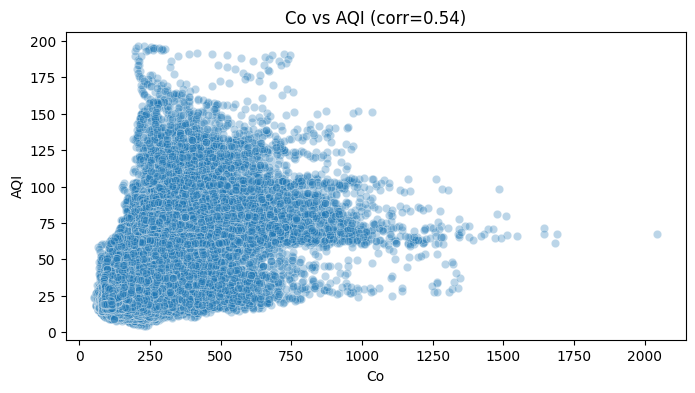

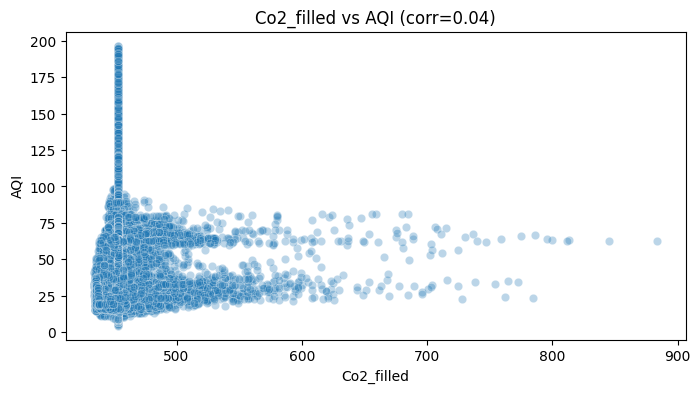

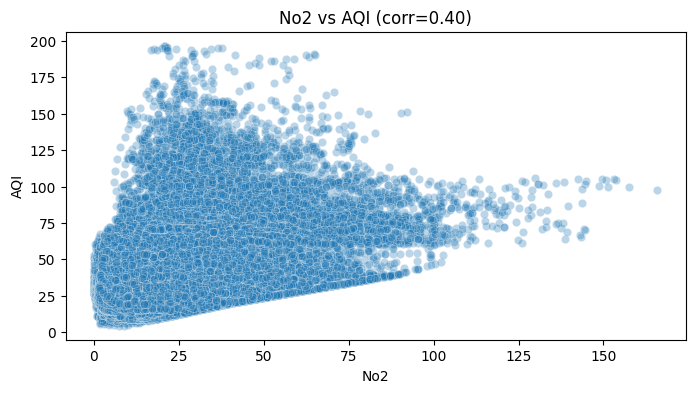

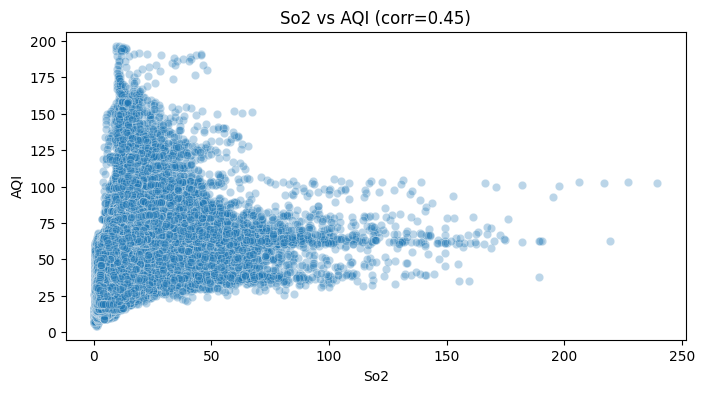

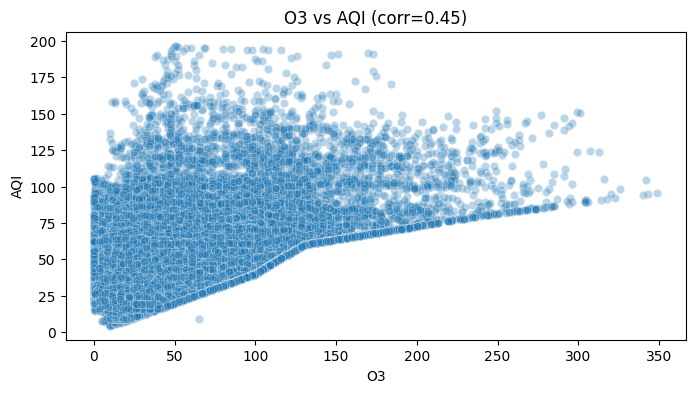

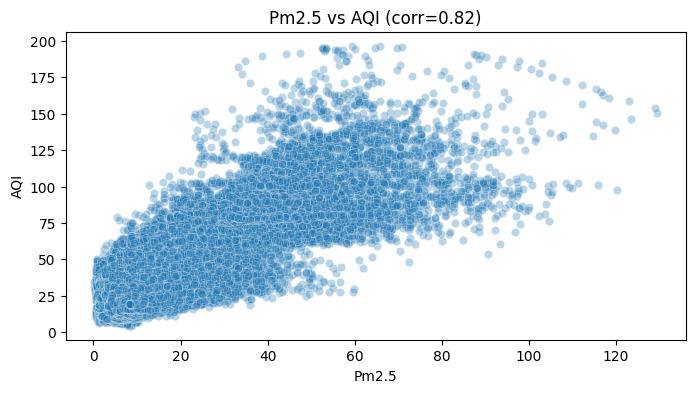

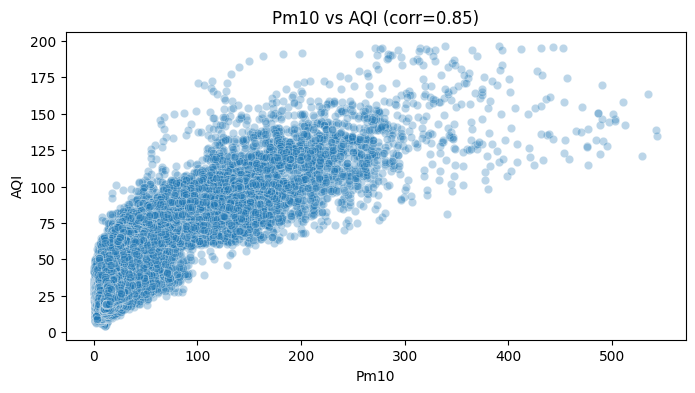

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Predictors vs. Target Scatterplots
for feature in features:
    plt.figure(figsize=(8,4))
    sns.scatterplot(x=air_quality_df[feature], y=air_quality_df['aqi'], alpha=0.3)
    corr = air_quality_df[[feature, 'aqi']].corr().iloc[0,1]
    plt.title(f'{feature.capitalize()} vs AQI (corr={corr:.2f})')
    plt.xlabel(feature.capitalize())
    plt.ylabel('AQI')

    plt.show()

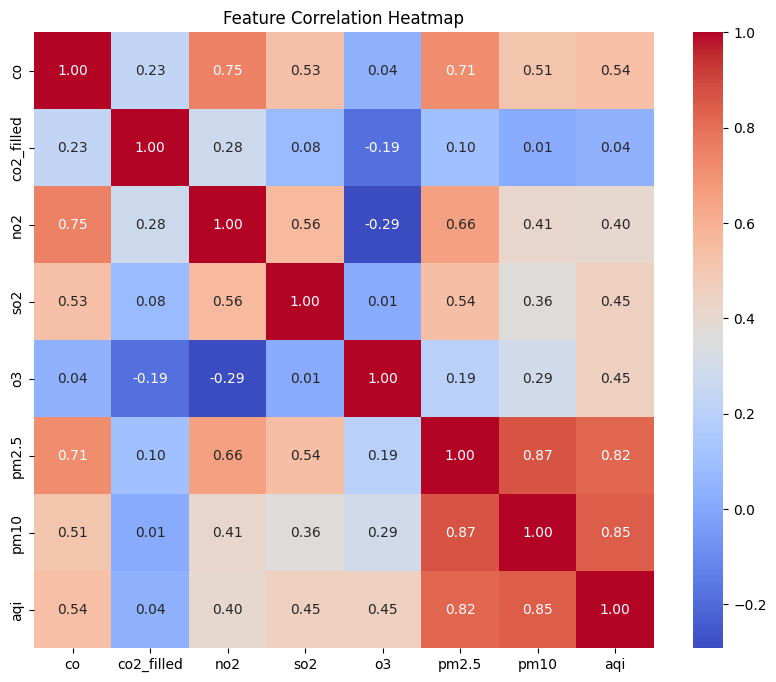

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Heatmap for Multicollinearity
plt.figure(figsize=(10,8))
corr_matrix = air_quality_df[features + ['aqi']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')

plt.show()

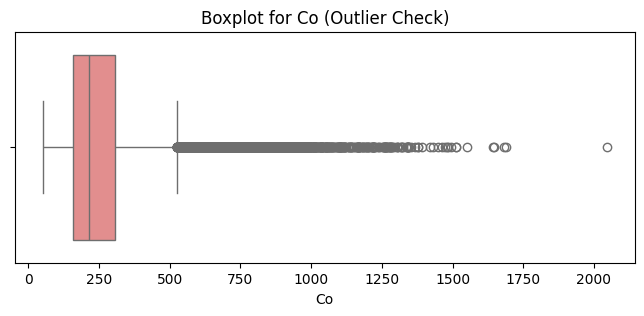

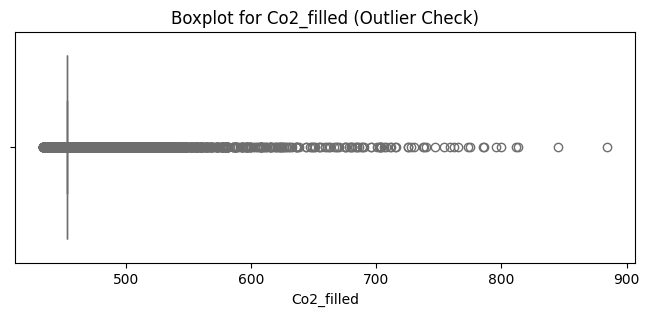

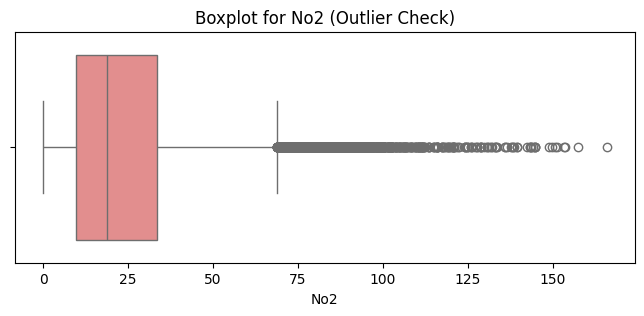

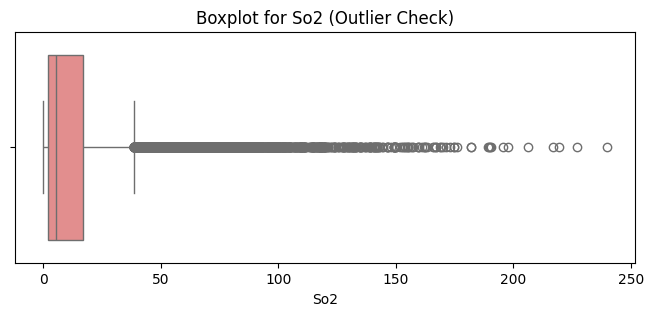

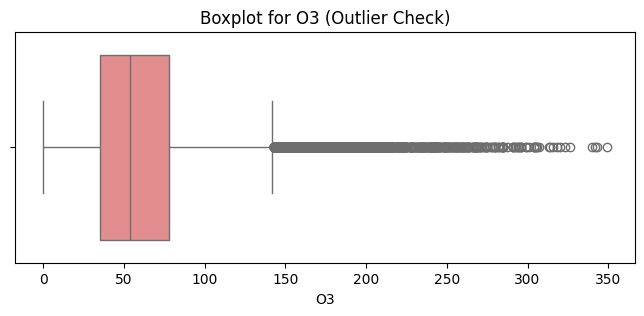

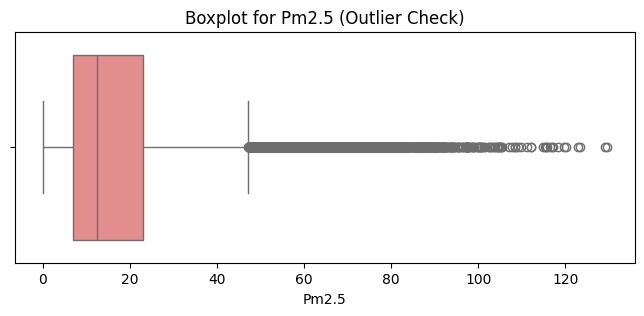

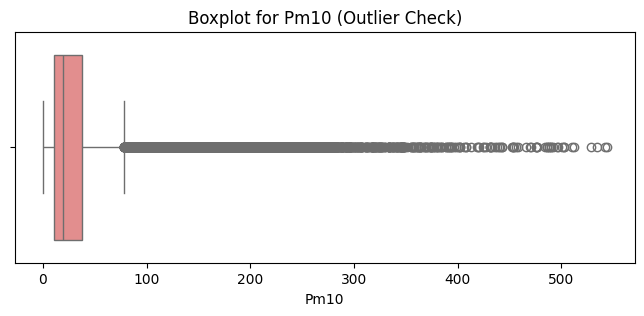

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Outlier Detection using Boxplots
for feature in features:
    plt.figure(figsize=(8,3))
    sns.boxplot(x=air_quality_df[feature], color='lightcoral')
    plt.title(f'Boxplot for {feature.capitalize()} (Outlier Check)')
    plt.xlabel(feature.capitalize())

    plt.show()

# 4. Split & Pre-Processing
---
Because my dataset also includes categorical types, I had to define the variables to be strictly numerical columns (which is the data I'm using in my linear regression model). This will be defined in my StandardScalar() step.

Summary:
 - Define features and target variable for 60% train, 20% validation, 20% test splits. Split visualized on bar graph
 - Scaling features and visualize on histogram
---

Train size: 31622
Validation size: 10541
Test size: 10541


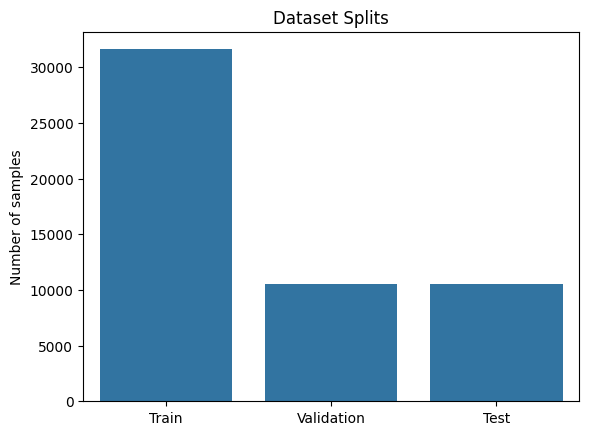

In [ ]:
# Python code for data splitting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Define features and target variable
X = air_quality_df.drop('aqi', axis=1)
y = air_quality_df['aqi']

# 60% train, 20% validation, 20% test splits
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Confirming splits
print(f"Train size: {X_train.shape[0]}")
print(f"Validation size: {X_val.shape[0]}")
print(f"Test size: {X_test.shape[0]}")

# Visualising the splits
counts = [X_train.shape[0], X_val.shape[0], X_test.shape[0]]
labels = ['Train', 'Validation', 'Test']
sns.barplot(x=labels, y=counts)
plt.ylabel('Number of samples')
plt.title('Dataset Splits')
plt.show()

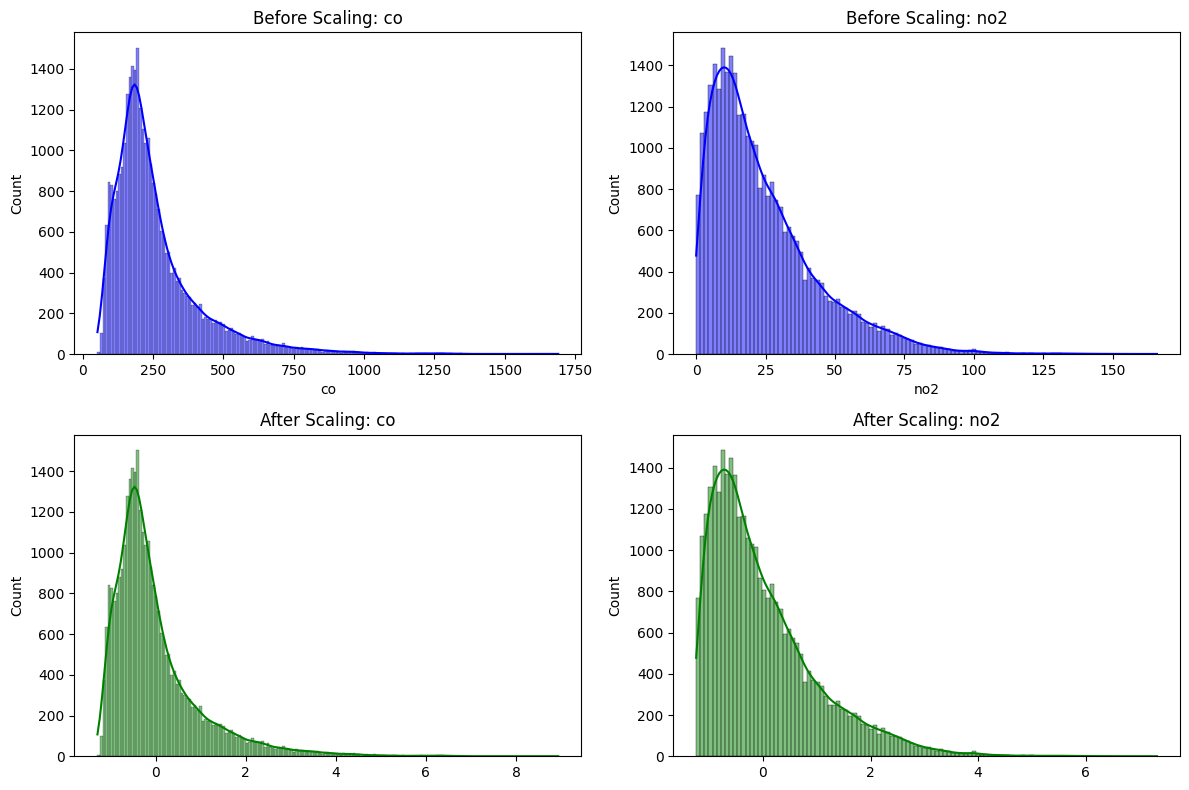

In [ ]:
# Scaling the features
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# For defining the features, we will only keep numeric columns for scaling
# The original co2 column is skipped as it includes NaN values and we imputed them in co2_filled
X_train_num = X_train.select_dtypes(include='number').drop(columns=['co2'], errors='ignore')
X_val_num = X_val[X_train_num.columns]
X_test_num = X_test[X_train_num.columns]

# Create standard scalar and fit
scaler = StandardScaler()
scaler.fit(X_train_num)

# Transforming the variables to be scaled
X_train_scaled = scaler.transform(X_train_num)
X_val_scaled = scaler.transform(X_val_num)
X_test_scaled = scaler.transform(X_test_num)

# Visualising scaling effect (histograms before & after)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Column 0 ('co')
col_idx_1 = 0
col_name_1 = X_train_num.columns[col_idx_1]

sns.histplot(X_train_num.iloc[:, col_idx_1], kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title(f'Before Scaling: {col_name_1}')

sns.histplot(X_train_scaled[:, col_idx_1], kde=True, ax=axes[1, 0], color='green')
axes[1, 0].set_title(f'After Scaling: {col_name_1}')

# Column 1 ('no2')
col_idx_2 = 1
col_name_2 = X_train_num.columns[col_idx_2]

sns.histplot(X_train_num.iloc[:, col_idx_2], kde=True, ax=axes[0, 1], color='blue')
axes[0, 1].set_title(f'Before Scaling: {col_name_2}')

sns.histplot(X_train_scaled[:, col_idx_2], kde=True, ax=axes[1, 1], color='green')
axes[1, 1].set_title(f'After Scaling: {col_name_2}')

plt.tight_layout()
plt.show()

# 5. Linear Regression Model
---
**Summary:**
- Fit an Ordinary Least Squares (OLS) regression model
- Compute error metrics (RMSE and MAE)
- Define coefficients and display first 10 rows
- Residual diagonistic on y validation and validation prediction split
---

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# First, instantiate the estimator
ols = LinearRegression(n_jobs=-1)   # n_jobs=-1 → use every CPU core

# Fit on the *scaled* training data
ols.fit(X_train_scaled, y_train)

# Predict on the validation split
val_pred = ols.predict(X_val_scaled)

# Compute error metrics RMSE and MAE
rmse_val = np.sqrt(mean_squared_error(y_val, val_pred))  # explicit √
mae_val  = mean_absolute_error(y_val, val_pred)

print(f"Validation RMSE: {rmse_val:.3f}")
print(f"Validation MAE : {mae_val:.3f}")

Validation RMSE: 5.688
Validation MAE : 3.660


In [ ]:
import pandas as pd

# Define coefficients of each predictor
coef_df = (
    pd.Series(ols.coef_, index=X_train_num.columns, name="coefficient")
      .sort_values(key=lambda x: x.abs(), ascending=False)
      .to_frame()
)

# Display the whole table or just the top 10 rows in your notebook
coef_df.head(10)

,coefficient
log_aqi,19.572738
pm10,9.422631
no2,-1.124816
co,0.661633
pm2.5,-0.579872
so2,-0.513018
o3,-0.270483
co2_filled,0.077697


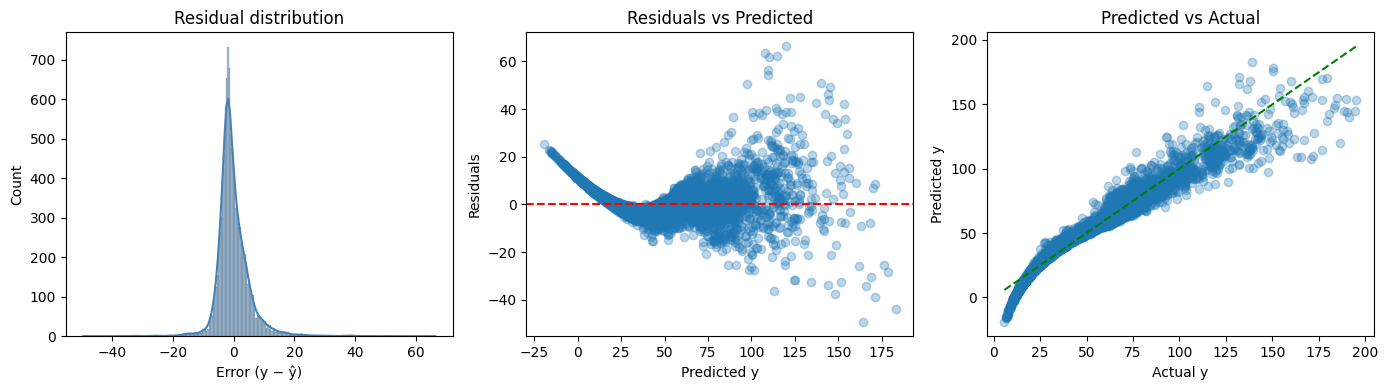

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the residual and plot
residuals = y_val - val_pred
fig, axes = plt.subplots(1, 3, figsize=(14,4))

# Histogram of residuals
sns.histplot(residuals, kde=True, ax=axes[0], color="steelblue")
axes[0].set_title("Residual distribution")
axes[0].set_xlabel("Error (y − ŷ)")

# Scatterplot - Residuals vs predicted
axes[1].scatter(val_pred, residuals, alpha=0.3)
axes[1].axhline(0, color="red", ls="--")
axes[1].set_xlabel("Predicted y")
axes[1].set_ylabel("Residuals")
axes[1].set_title("Residuals vs Predicted")

# Scatterplot - Predicted vs actual
axes[2].scatter(y_val, val_pred, alpha=0.3)
axes[2].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()],
             color="green", ls="--")
axes[2].set_xlabel("Actual y")
axes[2].set_ylabel("Predicted y")
axes[2].set_title("Predicted vs Actual")

plt.tight_layout()
plt.show()

# 6. Evaluation on test set
---
**Summary:**  
- Define scaled test feature
- Define test metrics (Test RMSE, Test MAE, Test R²)
---

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predict on the scaled test features
test_pred = ols.predict(X_test_scaled)

# TEST RMSE, MAE, R² Metrics
rmse_test = np.sqrt(mean_squared_error(y_test, test_pred))
mae_test  = mean_absolute_error(y_test, test_pred)
r2_test   = r2_score(y_test, test_pred)

print(f"Test RMSE : {rmse_test:.3f}\n")
print(f"Test MAE  : {mae_test:.3f}\n")
print(f"Test R²   : {r2_test:.3f}\n")

Test RMSE : 5.425

Test MAE  : 3.604

Test R²   : 0.957



# 7. Interpretation
---
Based on my EDA, the co and pm10 tend to be the most drastic in terms of driving AQI levels.  
**Summary:**
- Define original and scaled distribution of co and pm10
- Verify scale of co and pm10 numerically
- Raw correlation with target
- Inspect scaled values with dataframe
---

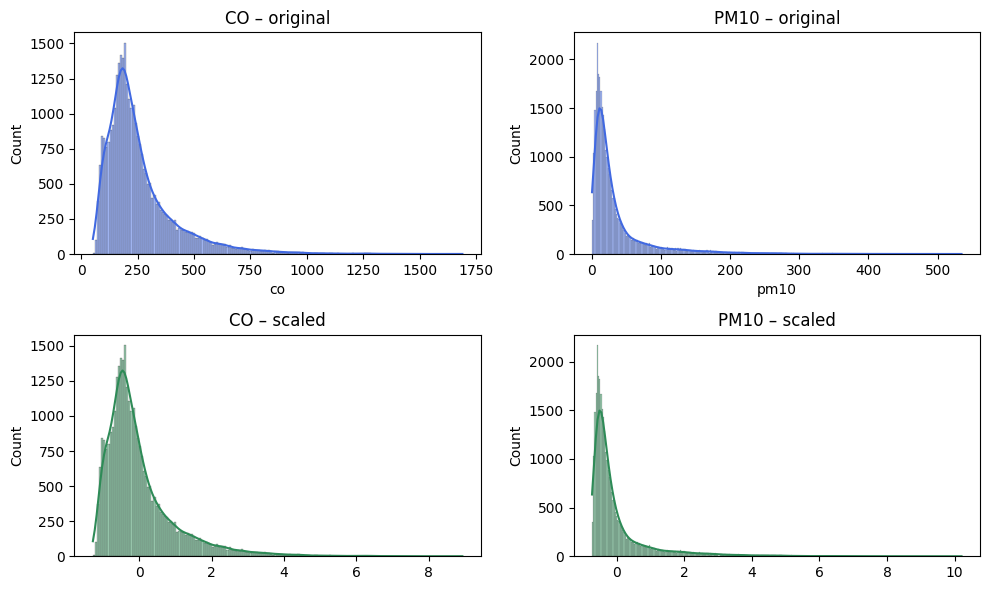

Scaled means  (co, pm10): [ 0. -0.]
Scaled stddevs(co, pm10): [1. 1.]


,co,pm10,aqi
co,1.000000,0.514528,0.537100
pm10,0.514528,1.000000,0.845944
aqi,0.537100,0.845944,1.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Identify column positions for pm2.5 & pm10
co_idx = X_train_num.columns.get_loc("co")
pm10_idx = X_train_num.columns.get_loc("pm10")

# Visualise before vs after scaling
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Original distributions
sns.histplot(X_train_num["co"],  kde=True, ax=axes[0,0], color="royalblue")
axes[0,0].set_title("CO – original")
sns.histplot(X_train_num["pm10"], kde=True, ax=axes[0,1], color="royalblue")
axes[0,1].set_title("PM10 – original")

# Scaled distributions
sns.histplot(X_train_scaled[:, co_idx], kde=True, ax=axes[1,0], color="seagreen")
axes[1,0].set_title("CO – scaled")
sns.histplot(X_train_scaled[:, pm10_idx], kde=True, ax=axes[1,1], color="seagreen")
axes[1,1].set_title("PM10 – scaled")

plt.tight_layout()
plt.show()

# Verify scaling numerically
print("Scaled means  (co, pm10):",
      np.round([X_train_scaled[:, pm10_idx].mean(),
                X_train_scaled[:, co_idx].mean()], 4))
print("Scaled stddevs(co, pm10):",
      np.round([X_train_scaled[:, pm10_idx].std(),
                X_train_scaled[:, co_idx].std()], 4))

# Raw correlations with target
corr = air_quality_df[["co", "pm10", "aqi"]].corr()
display(corr.style.background_gradient(cmap="coolwarm", vmin=-1, vmax=1))


In [ ]:
# Reattach column names to inspect scaled values
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_num.columns)

display(X_train_scaled_df.head())

,co,no2,so2,o3,pm2.5,pm10,co2_filled,log_aqi
0,0.252935,0.172481,-0.107323,0.382606,1.249202,2.913558,-0.116844,1.878438
1,-0.783473,-0.860806,-0.665434,0.148118,-0.842348,-0.571905,-0.116844,-0.489274
2,-0.227808,-0.984800,-0.659680,1.216342,-0.791490,-0.625119,-0.858913,0.419515
3,0.359074,1.133438,-0.320210,-0.477183,-0.276549,-0.287420,-0.116844,0.288172
4,-0.608657,-0.323496,-0.602143,-0.138478,-0.880492,-0.621025,-0.116844,-0.800696


# Bonus plots
---
- Waterfall graph visualizing top preditors to AQI
- Mini K means cluster to see quantity of CO and PM10 levels
---
((The k means cluster was made with support from ChatGPT. Originally I wanted to do a k means cluster of all predictors, but my execution time was running 5 minutes+ when creating the graph. Therefore, I decided to do a mini cluster to compare the predictors that I think are most influential.))

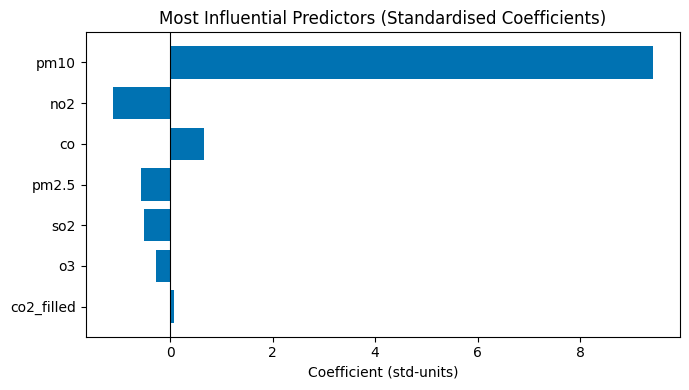

In [ ]:
# Top predictors driving Air Quality Index using coefficents
import pandas as pd
import matplotlib.pyplot as plt

# Build tidy coefficient frame, excluding 'log_aqi'
coef_series = pd.Series(ols.coef_, index=X_train_num.columns, name="coef")
coef_series = coef_series.drop("log_aqi", errors="ignore")

# Top 8 most influential features by absolute value
top8 = (coef_series
        .reindex(coef_series.abs()
        .sort_values(ascending=False).index)
        .head(8))

# Set color-blind friendly color
bar_color = "#0072B2"  # Blue from CUD palette

# Plot
plt.figure(figsize=(7, 4))
plt.barh(top8.index[::-1], top8.values[::-1], color=bar_color)
plt.axvline(0, color="black", linewidth=.8)
plt.title("Most Influential Predictors (Standardised Coefficients)")
plt.xlabel("Coefficient (std-units)")
plt.tight_layout()

# Save to PNG
plt.savefig("top_predictors_aqi.png", dpi=300)

# Display
plt.show()


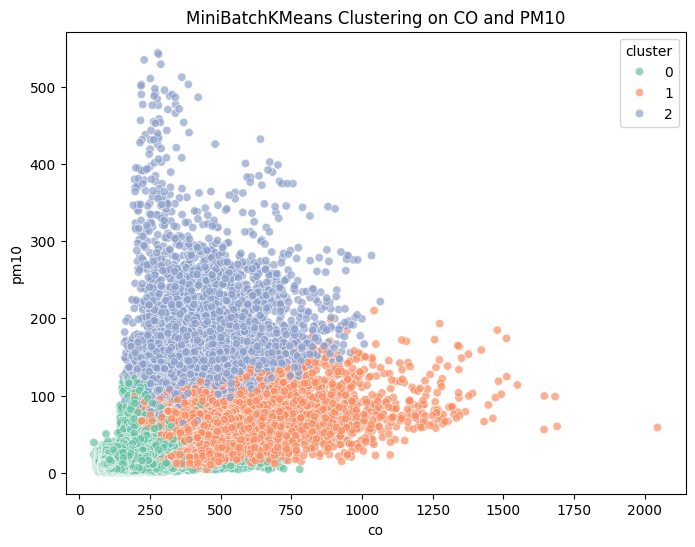

In [ ]:
# Mini K Means Clustering of CO and PM10 levels
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant features
features = ['co', 'co2_filled', 'no2', 'so2', 'pm2.5', 'pm10']
X = air_quality_df[features].dropna()  # Drop rows with missing values in these columns

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=3, random_state=42, batch_size=64)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to original (unscaled) DataFrame
X['cluster'] = clusters

# Visualize clusters (e.g. using two most relevant features)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=X, x='co', y='pm10', hue='cluster', palette='Set2', alpha=0.7)
plt.title("MiniBatchKMeans Clustering on CO and PM10")

# Save the plot as PNG
plt.savefig("kmeans_cluster_co_and_pm10.png", dpi=300)  # High-resolution PNG

plt.show()


---
Based on this model, it implies that the initial validation RMSE/MAE and test RMSE/MAE show a level of consistency when it comes to running this model on future records. Based on EDA and residuals, it implies that the bigger the levels get the more outliers it shows.  
Of course there are some limitations, including the imputed data in co2_filled and outliers skewing the data (such as in feature correlation, scaling methods, interpretation).
Overall, it confirms my predition on pm10 jumping AQI levels the most compared to other air polluntants, co being the runner up.
